In [1]:
from brian2 import *
from brian2modelfitting import *

INFO       Cache size for target "cython": 1049 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "/home/alteska/.cython/brian_extensions" directory. [brian2]
WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
 [py.warnings]
WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyte

## HH

In [2]:
# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
El = -65*mV
EK = -90*mV
ENa = 50*mV
VT = -63*mV

dt = 0.01*ms

In [3]:
# Generate a step-current input and an "experimental" voltage trace
params_correct = {'gl': float(5e-5*siemens*cm**-2 * area),
                  'g_na': float(100*msiemens*cm**-2 * area),
                  'g_kd': float(30*msiemens*cm**-2 * area)}

defaultclock.dt = dt

In [4]:
tau = 0.1*ms

In [5]:
# The model
eqsHH = Equations('''
dnoise/dt = -noise/tau + tau**-0.5*xi : 1
I = noise * 5*nA: amp

dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I)/Cm : volt
dm/dt = 0.32*(mV**-1)*(13.*mV-v+VT)/
    (exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/
    (exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
g_na : siemens (constant)
g_kd : siemens (constant)
gl   : siemens (constant)
''')

In [6]:
G = NeuronGroup(1, eqsHH, 
                threshold='v > -40*mV',
                refractory='v > -40*mV',
               )
G.v = El

G.set_states(params_correct, units=False)
spike_mon = SpikeMonitor(G)
mon = StateMonitor(G, ['v', 'I'], record=0)

run(400*ms)


INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.18s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


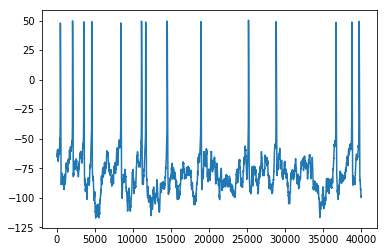

In [7]:
voltage1 = mon.v[0]/mV
plot(voltage1);

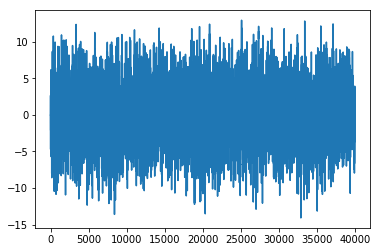

In [8]:
inp_cur1 = mon.I[0]/nA
plot(inp_cur1);

In [9]:
out_spikes1 = [spike_mon.spike_trains()[0]/ms]
out_spikes1

[array([  4.3 ,  20.36,  35.06,  45.53,  83.8 , 110.98, 116.47, 144.71,
        188.93, 251.56, 287.96, 366.54, 387.36, 396.95])]

In [10]:
start_scope()
G = NeuronGroup(1, eqsHH, 
                threshold='v > -40*mV',
                refractory='v > -40*mV',
               )
G.v = El

G.set_states(params_correct, units=False)
spike_mon = SpikeMonitor(G)
mon = StateMonitor(G, ['v', 'I'], record=0)

run(400*ms)

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.02s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


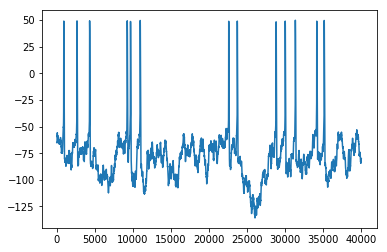

In [11]:
voltage2 = mon.v[0]/mV
plot(voltage2);

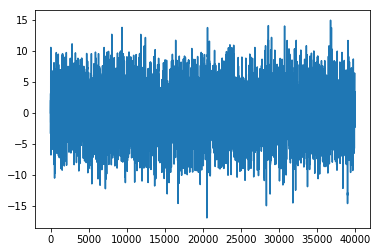

In [12]:
inp_cur2 = mon.I[0]/nA
plot(inp_cur2);

In [13]:
out_spikes2 = [spike_mon.spike_trains()[0]/ms]
out_spikes2

[array([  8.82,  26.2 ,  42.78,  92.22,  96.51, 109.27, 225.58, 236.84,
        287.86, 299.84, 313.12, 341.29, 351.08])]

In [14]:
out_spikes1

[array([  4.3 ,  20.36,  35.06,  45.53,  83.8 , 110.98, 116.47, 144.71,
        188.93, 251.56, 287.96, 366.54, 387.36, 396.95])]

In [16]:
out_spikes = [out_spikes1[0], out_spikes2[0]]
out_spikes

[array([  4.3 ,  20.36,  35.06,  45.53,  83.8 , 110.98, 116.47, 144.71,
        188.93, 251.56, 287.96, 366.54, 387.36, 396.95]),
 array([  8.82,  26.2 ,  42.78,  92.22,  96.51, 109.27, 225.58, 236.84,
        287.86, 299.84, 313.12, 341.29, 351.08])]

In [18]:
inp_current = [inp_cur1, inp_cur2]
inp_current

[array([ 0.        ,  1.04225565,  1.40675137, ...,  0.41639358,
        -0.77517932, -1.16004152]),
 array([ 0.        ,  0.87694183, -0.83205533, ..., -0.25847195,
        -0.87131219,  0.66395117])]

## Model Fitting

In [19]:
# tau = 12.44*ms
# taut = 97.64*ms
# a = 0.21
# alpha = 7.2*mV
# R = 76*Mohm

model = '''
        dv/dt = (R*I- v)/tau :volt
        dvt/dt = (a*v - vt) / taut :volt
        alpha : volt (constant)
        a : 1 (constant)
        R : ohm (constant)
        tau : second (constant)
        taut : second (constant)
        '''
reset = '''
v = 0*mV
vt = vt + alpha
'''

In [30]:
n_opt = NevergradOptimizer()
metric = GammaFactor(time=300*ms, delta=10*ms)

In [31]:
fitter = SpikeFitter(model=model, input_var='I', dt=dt,
                     input=inp_current * nA, output=out_spikes,
                     n_samples=30,
                     threshold='v > vt',
                     reset=reset,
                     refractory=1.4*ms,
                     param_init={'v': -65*mV},
                     )

In [32]:
result_dict, error = fitter.fit(n_rounds=40,
                                optimizer=n_opt,
                                metric=metric,
                                callback='text',
                                alpha=[5,10]*mV,
                                a = [0.1, 1],
                                R = [1, 100]*Mohm, 
                                tau = [10, 13]*ms,
                                taut = [90, 100]*ms,
                               )

Round 0: fit (0.011217459680037017, 0.006009280495318763, 0.6343752112229477, 80835371.3024467, 0.09591372021101625) with error: 15.976495726495749
Round 1: fit (0.011217459680037017, 0.006009280495318763, 0.6343752112229477, 80835371.3024467, 0.09591372021101625) with error: 15.976495726495749
Round 2: fit (0.010691929748034752, 0.005864596751313586, 0.6998887804397638, 90588344.5288126, 0.09550675712269326) with error: 15.23823028927966
Round 3: fit (0.010813616381745557, 0.005654615036773651, 0.6929076098218213, 94318006.21583056, 0.09494597377977902) with error: 15.031042128603126
Round 4: fit (0.010526151278735891, 0.00550242050525472, 0.9269931593406027, 93339973.41477138, 0.0958039395302622) with error: 14.270658090054447
Round 5: fit (0.010584426114083065, 0.005479613713326418, 0.9401231244944038, 94455442.79107337, 0.09301538990509825) with error: 14.007575757575776
Round 6: fit (0.010515461749888957, 0.0053667014447933625, 0.9485120707203255, 94994636.20205373, 0.096712470522

In [33]:
result_dict

{'tau': 0.010226248846685878,
 'alpha': 0.005405072169906837,
 'a': 0.92438405463755,
 'R': 97509467.97471528,
 'taut': 0.09097984155197046}

In [34]:
error

13.048333333333352

In [35]:
1 - error

-12.048333333333352

In [36]:
# visualization of the results
spikes = fitter.generate_spikes(params=None)
print('spike times:', spikes)

spike times: [array([ 11.9 ,  13.3 ,  14.81,  16.4 ,  20.54,  22.34,  34.01,  44.66,
        47.1 ,  65.24,  81.42, 104.96, 110.29, 111.69, 115.22, 116.62,
       143.7 , 150.55, 185.62, 188.41, 238.94, 245.96, 247.36, 251.45,
       252.85, 268.62, 285.99, 289.38, 290.97, 363.2 , 364.6 , 372.  ,
       381.62, 387.76, 392.66, 396.71]), array([  8.39,   9.84,  11.24,  15.93,  23.6 ,  25.98,  29.58,  42.4 ,
        47.98,  79.65,  91.95,  94.05,  95.9 , 105.36, 109.17, 165.4 ,
       177.83, 202.34, 213.25, 229.09, 231.28, 236.58, 277.93, 279.47,
       286.25, 287.87, 299.6 , 310.97, 312.93, 317.79, 336.27, 342.68,
       350.56, 369.23, 394.02])]


In [37]:
print(len(out_spikes[0]))
print(len(spikes[0]))

14
36


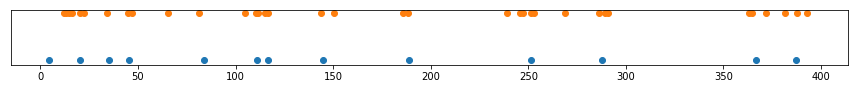

In [38]:
d=-1

fig, ax = plt.subplots(ncols=2, figsize=(30,1))

yticks(np.arange(0, 1, step=1))
scatter(out_spikes[0][:d], np.ones_like(out_spikes[0][:d]));
scatter(spikes[0][:d], np.ones_like(spikes[0][:d])*2);

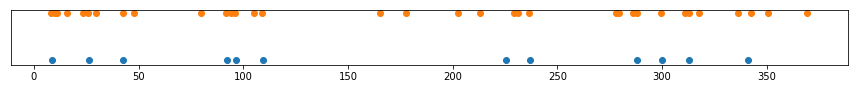

In [39]:
d=-1

plt.figure(figsize=(15,1))

yticks(np.arange(0, 1, step=1))
scatter(out_spikes[1][:d], np.ones_like(out_spikes[1][:d]));
scatter(spikes[1][:d], np.ones_like(spikes[1][:d])*2);